# 05_05: Weather Charts

In [ ]:
# note: this notebook requires Python 3.6 or higher

In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

<img src="nytimes.png">

In [2]:
import getweather

In [4]:
# for records: get TMIN/TMAX arrays for years 1910-2018, stack vertically in array

allyears = np.vstack([getweather.getyear('PASADENA', ['TMIN','TMAX'], year)
                      for year in range(1910, 2019)])

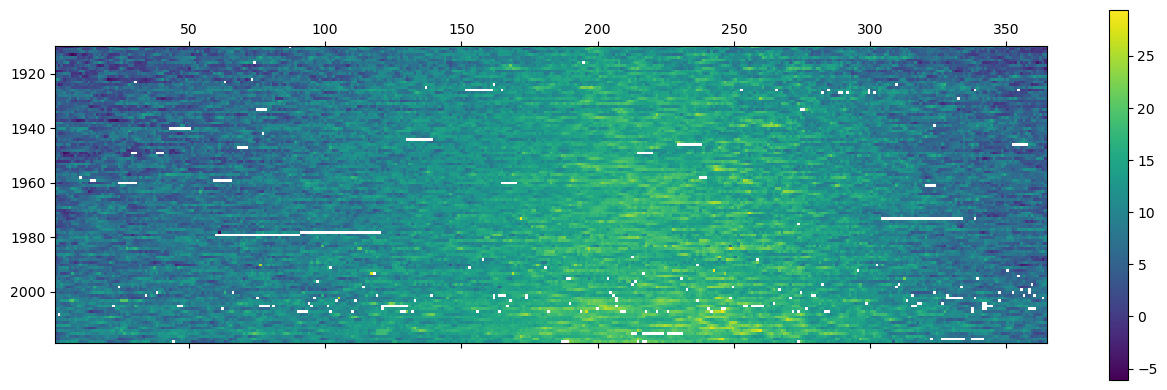

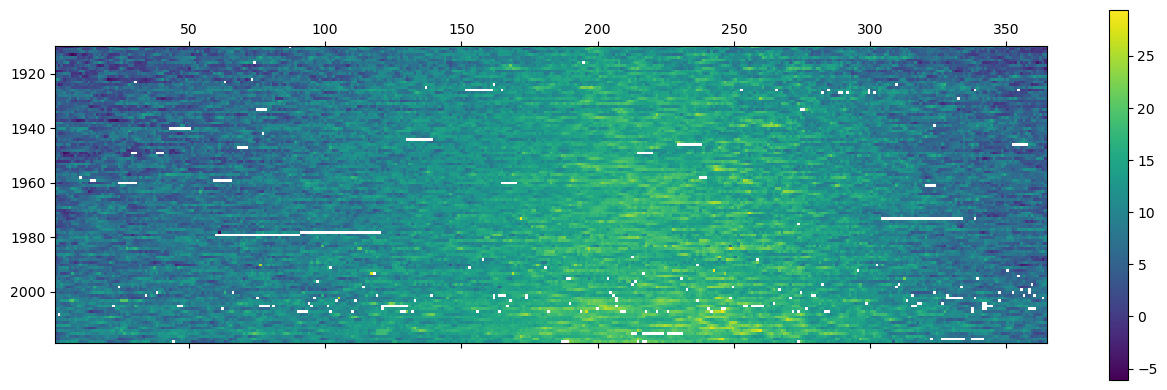

In [6]:
# show stacked array as colored map, specifying axis values,
# and creating temperature-reference colorbar

pp.matshow(allyears['TMIN'], extent=[1,365,2019,1910])
pp.colorbar()
pp.show()

In [7]:
# min and max of TMIN/TMAX along all years, excluding NaNs

tmin_record = np.nanmin(allyears['TMIN'], axis=0)
tmax_record = np.nanmax(allyears['TMAX'], axis=0)

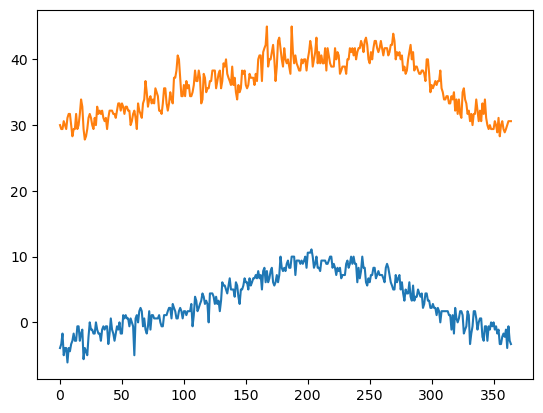

In [8]:
pp.plot(tmin_record)
pp.plot(tmax_record)
pp.show()

In [9]:
# for normals: get TMIN/TMAX arrays for years 1981-2010, stack vertically in array

normal = np.vstack([getweather.getyear('PASADENA', ['TMIN','TMAX'], year)
                    for year in range(1981, 2011)])

In [10]:
# mean of TMIN/TMAX across 1981-2010 years, excluding NaNs

tmin_normal = np.nanmean(normal['TMIN'], axis=0)
tmax_normal = np.nanmean(normal['TMAX'], axis=0)

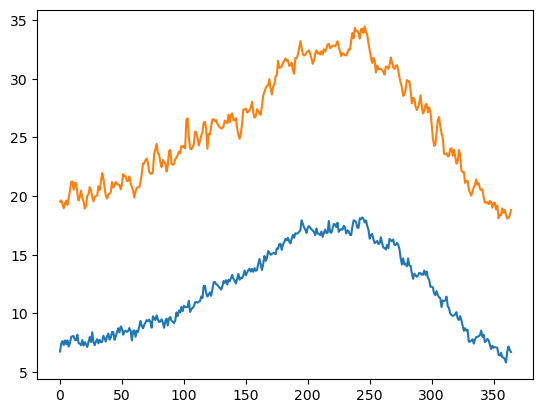

In [11]:
pp.plot(tmin_normal)
pp.plot(tmax_normal)
pp.show()

In [12]:
station, year = 'PASADENA', 2018

thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)

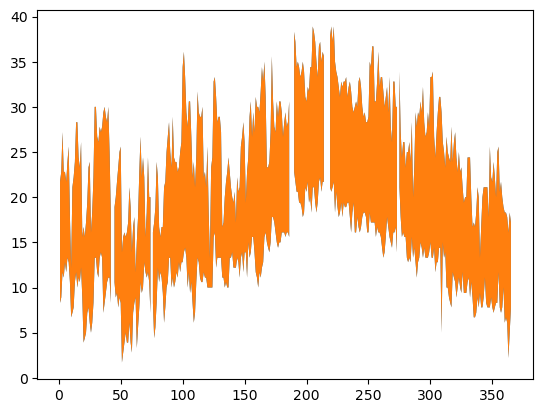

In [14]:
# fill area between horizontal curves (days, thisyear['TMIN']) and (days, thisyear['TMAX'])

days = np.arange(1, 366)

pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'])
pp.show()

In [15]:
avg = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))

In [16]:
avg

19.4620142532151

In [17]:
# formatted string literal: will insert values of variable in braces
f'{station}, {year}: average temperature = {avg:.2f} C'

'PASADENA, 2018: average temperature = 19.46 C'

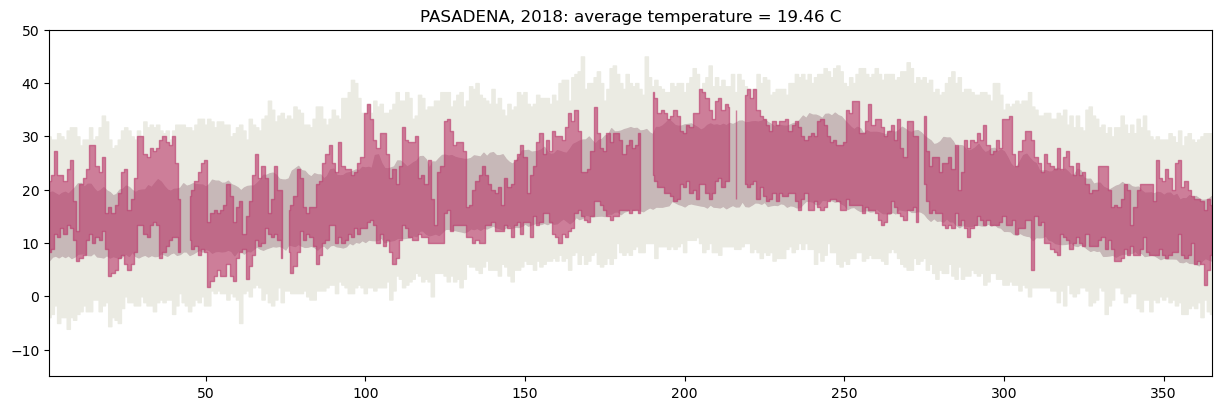

In [18]:
# show normals, records, and current year bands together

pp.figure(figsize=(15,4.5))

pp.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid')
pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72))

pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'],
                color=(0.73,0.21,0.41), alpha=0.6, step='mid')

pp.axis(xmin=1, xmax=365, ymin=-15, ymax=50)

pp.title(f'{station}, {year}: average temperature = {avg:.2f} C');
pp.show()

In [23]:
# collect data and make chart for any city and current year,
# following the same steps as above

def nyplot(station, year):
    pp.figure(figsize=(15,4.5))
    
    allyears = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                          for year in range(1910, 2020)])
    
    normal = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                        for year in range(1981, 2011)])

    tmin_record, tmax_record = np.nanmin(allyears['TMIN'], axis=0), np.nanmax(allyears['TMAX'], axis=0)
    tmin_normal, tmax_normal = np.nanmean(normal['TMIN'], axis=0), np.nanmean(normal['TMAX'], axis=0)

    days = np.arange(1, 366)

    pp.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid')
    pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72))
    
    thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)

    pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73,0.21,0.41), alpha=0.6, step='mid')

    pp.axis(xmin=1, xmax=365, ymin=-15, ymax=50)
    
    avg = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))
    pp.title(f'{station}, {year}: average temperature = {avg:.2f} C');


In [24]:
nyplot('NEW YORK', 2018)

OSError: Station not available.